<a href="https://colab.research.google.com/github/JaimeVillanueva/Capstone/blob/master/source/location_code_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import os
os.chdir('/content/drive/My Drive/Colab Notebooks/Git Capstone/Capstone/source')

In [3]:
import os
os.getcwd()

'/content/drive/My Drive/Colab Notebooks/Git Capstone/Capstone/source'

In [1]:
import warnings
warnings.simplefilter('ignore', FutureWarning)
import pandas as pd
import numpy as np
import operator
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from mrcnn.config import Config
from mrcnn.model import MaskRCNN
from mrcnn.visualize import display_instances
from PIL import Image, ImageDraw, ImageFont
from matplotlib.pyplot import imshow
from itertools import combinations, product
from string import ascii_uppercase

Using TensorFlow backend.


In [2]:
# define the test configuration
class TestConfig(Config):
    NAME = "test"
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1
    NUM_CLASSES = 1 + 80

In [ ]:
# define the model
rcnn = MaskRCNN(mode='inference', model_dir='./', config=TestConfig())

# load coco model weights
rcnn.load_weights('../data/mask_rcnn_coco.h5', by_name=True)

In [ ]:
class_names = ['BG', 'person', 'bicycle', 'car', 'motorcycle', 'airplane',
               'bus', 'train', 'truck', 'boat', 'traffic light',
               'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird',
               'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear',
               'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie',
               'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball',
               'kite', 'baseball bat', 'baseball glove', 'skateboard',
               'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup',
               'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple',
               'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza',
               'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed',
               'dining table', 'toilet', 'tv', 'laptop', 'mouse', 'remote',
               'keyboard', 'cell phone', 'microwave', 'oven', 'toaster',
               'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors',
               'teddy bear', 'hair drier', 'toothbrush']

In [ ]:
class_dimensions = {'BG':[1,1,1], 'person':[1.7,0.4,0.3], 'bicycle':[0.8,1.7,0.3], 'car':[1.5,4.8,1.9], 'motorcycle':[0.9,2.1,0.5],
               'airplane':[11.3,36.6,28.3],'bus':[3.1,12.2,2.6], 'train':[4.6,17.1,3.4], 'truck':[4.1,22.0,2.6], 'boat':[1.5,4.9,1.9], 'traffic light':[0.8,0.24,0.15],
               'fire hydrant':[0.73,0.25,0.25], 'stop sign':[0.76,0.76,0.002], 'parking meter':[1.2,0.2,0.15], 'bench':[0.9,1.8,0.61], 'bird':[0.25,0.15,0.15],
               'cat':[0.25,0.51,0.2], 'dog':[0.64,0.91,0.38], 'horse':[1.7,2.4,0.91], 'sheep':[1.17,1.27,0.58], 'cow':[1.7,2.45,0.82], 'elephant':[3.2,4.0,2], 'bear':[1.5,3.0,1.0],
               'zebra':[1.6,2.0,0.5], 'giraffe':[5.8,2.4,0.6], 'backpack':[0.43,0.23,0.15], 'umbrella':[0.7,1.0,0.05], 'handbag':[0.18,0.25,0.09], 'tie':[0.51,0.07,0.001],
               'suitcase':[0.76,0.53,0.30], 'frisbee':[0.28,0.28,0.025], 'skis':[1.7,0.1,0.025], 'snowboard':[1.57,0.25,0.025], 'sports ball':[0.24,0.24,0.24],
               'kite':[1.27,1.52,0.002], 'baseball bat':[0.81,0.064,0.064], 'baseball glove':[0.31,0.31,0.13], 'skateboard':[0.79,0.2,0.003],
               'surfboard':[2.13,0.53,0.076], 'tennis racket':[0.71,0.25,0.25], 'bottle':[0.18,0.018,0.018], 'wine glass':[0.15,0.05,0.05], 'cup':[0.12,0.092,0.092],
               'fork':[0.15,0.025,0.002], 'knife':[0.23,0.02,0.002], 'spoon':[0.14,0.025,0.002], 'bowl':[0.13,0.27,0.27], 'banana':[0.18,0.038,0.038], 'apple':[0.076,0.076,0.076],
               'sandwich':[0.13,0.064,0.03], 'orange':[0.076,0.076,0.076], 'broccoli':[0.03,0.03,0.03], 'carrot':[0.18,0.025,0.025], 'hot dog':[0.18,0.03,0.03], 'pizza':[0.31,0.31,0.002],
               'donut':[0.076,0.076,0.051], 'cake':[0.25,0.25,0.12], 'chair':[0.83,0.51,0.51], 'couch':[0.71,2.34,0.76], 'potted plant':[0.38,0.14,0.14], 'bed':[0.98,2.25,1.73],
               'dining table':[0.74,2.4,1.0], 'toilet':[0.72,0.72,0.49], 'tv':[0.83,1.5,0.05], 'laptop':[0.2,0.28,0.02], 'mouse':[0.02,0.11,0.05], 'remote':[0.1,0.05,0.025],
               'keyboard':[0.30,0.12,0.01], 'cell phone':[0.14,0.071,0.005], 'microwave':[0.25,0.46,0.36], 'oven':[1.2,0.76,0.76], 'toaster':[0.19,0.27,0.16],
               'sink':[0.53,0.56,0.18], 'refrigerator':[1.78,0.91,0.91], 'book':[0.25,0.15,0.03], 'clock':[0.31,0.31,0.05], 'vase':[0.20,0.1,0.1], 'scissors':[0.20,0.05,0.002],
               'teddy bear':[0.38,0.19,0.1], 'hair dryer':[0.25,0.22,0.076], 'toothbrush':[0.18,0.013,0.013]}

In [9]:
from collections import Counter
class_ratios = dict(Counter({key:np.prod(class_dimensions[key])/np.prod(class_dimensions['person']) for (key, value) in class_dimensions.items()}).most_common())
class_ratios

{'BG': 4.901960784313725,
 'airplane': 57374.088235294126,
 'apple': 0.002151843137254902,
 'backpack': 0.0727205882352941,
 'banana': 0.0012741176470588234,
 'baseball bat': 0.016263529411764708,
 'baseball glove': 0.06124019607843137,
 'bear': 22.058823529411764,
 'bed': 18.69926470588235,
 'bench': 4.844117647058823,
 'bicycle': 2.0,
 'bird': 0.0275735294117647,
 'boat': 68.45588235294117,
 'book': 0.005514705882352941,
 'bottle': 0.0002858823529411764,
 'bowl': 0.04645588235294119,
 'broccoli': 0.00013235294117647058,
 'bus': 482.01960784313724,
 'cake': 0.036764705882352935,
 'car': 67.05882352941175,
 'carrot': 0.0005514705882352941,
 'cat': 0.125,
 'cell phone': 0.0002436274509803922,
 'chair': 1.05825,
 'clock': 0.02355392156862745,
 'couch': 6.189529411764704,
 'cow': 16.741666666666664,
 'cup': 0.004978823529411764,
 'dining table': 8.705882352941176,
 'dog': 1.0848627450980393,
 'donut': 0.0014439999999999998,
 'elephant': 125.49019607843137,
 'fire hydrant': 0.2236519607843

In [0]:
class ObjectMapping:
    '''
        Required:
        import pandas as pd
        import numpy as np
        import operator
        from keras.preprocessing.image import load_img
        from keras.preprocessing.image import img_to_array
        from mrcnn.config import Config
        from mrcnn.model import MaskRCNN
        from mrcnn.visualize import display_instances
        from PIL import Image, ImageDraw, ImageFont
        from matplotlib.pyplot import imshow
        from itertools import combinations, product
        from string import ascii_uppercase
    ''' 
    
    def __init__ (self, filename, results, class_names):
        self.filename = filename
        self.r = results                    # results contain rois, class_ids, masks, and scores
        self.class_names = class_names
        self.img_height = self.r['masks'].shape[0]
        self.img_width = self.r['masks'].shape[1]
        self.total_objects = len(self.r['rois'])
    
    def get_box(self, object_id):
        object_id = object_id-1
        h1 = self.r['rois'][object_id][0]
        h2 = self.r['rois'][object_id][2]
        w1 = self.r['rois'][object_id][1]
        w2 = self.r['rois'][object_id][3]
        return (h1, w1, h2, w2)
    
    def get_objectID(self):
        return {index:self.class_names[self.r['class_ids'][index-1]] for index, array in enumerate(self.r['rois'],\
                                                                                                   start=1)}
    
    def object_class(self, object_id):
        object_id = object_id-1
        return self.class_names[self.r['class_ids'][object_id]]
    
    def count_objects(self):
        "summarize type of objects detected with count"
        objects = [self.class_names[index] for index in self.r['class_ids']]
        objects = dict(zip(*np.unique(objects, return_counts=True)))
        return objects
    
    def get_mask(self, object_id):
        object_id = object_id-1
        return self.r['masks'][:,:,object_id]
    
    def _merge_masks(self, *args):
        """Internal. Merge mask boolean arrays"""
        mask = self._false_canvas()
        for ids in args:
            if(isinstance(ids, np.ndarray)):
                mask = np.bitwise_or(mask, ids.copy())
            else:    
                mask = np.bitwise_or(mask, self.get_mask(ids).copy())
        return mask
    
    def _show_massbox(self, *args, size=2):
        mass_boxes = self._false_canvas()
        """Internal. Only for displaying mass boxes for masks that have an object ID"""
        for ids in args:
            h1, w1, h2, w2 = self.mass_box(ids)
            mass_boxes[h1:h2, w1:w2] = True
            mass_boxes[h1+size:h2-size, w1+size:w2-size] = False
        return mass_boxes
    
    def show_mask(self, *args, show_massbox = False):
        """Creates PIL image from a matrix of booleans. Shows a mask that is either
           directly passed as a boolean matrix or that is retrieved using the object ID.
           Mass box is only for a mask that is retrieved with the object ID."""
        mask = self._merge_masks(*args)
        if show_massbox:
            mass_boxes = self._show_massbox(*args)
            mask = np.bitwise_or(mask, mass_boxes)
        mask_size = mask.shape[::-1]
        maskbytes = np.packbits(mask, axis=1)
        return Image.frombytes(mode='1', size=mask_size, data=maskbytes)
           
    def box_center(self, object_id):
        h1, w1, h2, w2 = self.get_box(object_id)
        hbb_center = int((h1+h2)/2)
        wbb_center = int((w1+w2)/2)
        return (hbb_center, wbb_center)

    def mask_pixel_count(self, object_id):
        h1, w1, h2, w2 = self.get_box(object_id)
        mask = self.get_mask(object_id)
        return (np.sum(mask[h1:h2, w1:w2]))
    
    def mask_pixel_count(self, object_id, h1, w1, h2, w2):
        mask = self.get_mask(object_id)
        return (np.sum(mask[h1:h2, w1:w2]))
    
    def _best_coord(self, object_id, current_coords, step_coord, add=True):
        """Internal only. As edges of the bounding box are scanned in one at a time,
           this returns the coordinate that maximizes number of mask pixels multiplied 
           by the percentage of mask pixels remaining in the moving bounding box."""
        step=1
        step_variable = current_coords[step_coord]
        h1, w1, h2, w2 = current_coords
        bmask = self.get_mask(object_id)
        true_count = np.sum(bmask[h1:h2, w1:w2])
        bmask_area = bmask.shape[0]*bmask.shape[1]
        
        check_max = (true_count/bmask_area)*true_count # Track largest product of perc and count
        temp_area = bmask_area                         # Initialize to any value. Shrinks as step_variable changes
        while(temp_area != 0):
            if(add):
                step_variable = step_variable + step
            else:
                step_variable = step_variable - step
                
            box_adj = {0:bmask[step_variable:h2, w1:w2],
                       1:bmask[h1:h2, step_variable:w2],
                       2:bmask[h1:step_variable, w1:w2],
                       3:bmask[h1:h2, w1:step_variable]}
            
            temp_mask = box_adj[step_coord]
            temp_true = np.sum(temp_mask)
            temp_area = temp_mask.shape[0]*temp_mask.shape[1]
            if (temp_area != 0):
                temp_perc = temp_true/temp_area
            if (temp_true*temp_perc > check_max):
                best_step_variable = step_variable
                check_max = temp_true*temp_perc       
        return best_step_variable
    
    def mass_box(self, object_id):
        """Adjustment to bounding box to reflect a better center of mass"""
        h1, w1, h2, w2 = self.get_box(object_id)
        w1_best = self._best_coord(object_id, (h1, w1, h2, w2), 1, add=True)
        w2_best = self._best_coord(object_id, (h1, w1_best, h2, w2), 3, add=False)
        h2_best = self._best_coord(object_id, (h1, w1_best, h2, w2_best), 2, add=False)
        h1_best = self._best_coord(object_id, (h1, w1_best, h2_best, w2_best), 0, add=True)
                             
        return(h1_best, w1_best, h2_best, w2_best)
                                
    def mass_center(self, object_id):
        h1, w1, h2, w2 = self.mass_box(object_id)
        hm_center = int((h1+h2)/2)
        wm_center = int((w1+w2)/2)
        return (hm_center, wm_center)
    
    def object_location(self, object_id):
        imgH_center_range = [0.333*self.img_height, 0.667*self.img_height]
        imgW_center_range = [0.4*self.img_width, 0.6*self.img_width]
        # section canvas into horizontal and vertical thirds
        htop = (0, 0, int(imgH_center_range[0]), self.img_width)
        hcenter = (int(imgH_center_range[0]), 0, int(imgH_center_range[1]), self.img_width)
        hbottom = (int(imgH_center_range[1]), 0, self.img_height, self.img_width)
        wleft = (0, 0, self.img_height, int(imgW_center_range[0]))
        wcenter = (0, int(imgW_center_range[0]), self.img_height, int(imgW_center_range[1]))
        wright = (0, int(imgW_center_range[1]), self.img_height, self.img_width)
        
        # count the number of pixels in each section
        htop_pixels = self.mask_pixel_count(object_id, *htop)
        hcenter_pixels = self.mask_pixel_count(object_id, *hcenter)
        hbottom_pixels = self.mask_pixel_count(object_id, *hbottom)
        wleft_pixels = self.mask_pixel_count(object_id, *wleft)
        wcenter_pixels = self.mask_pixel_count(object_id, *wcenter)
        wright_pixels = self.mask_pixel_count(object_id, *wright)
        
        hloc_dict = {'top':htop_pixels, 'center':hcenter_pixels, 'bottom':hbottom_pixels}
        wloc_dict = {'left':wleft_pixels, 'center':wcenter_pixels, 'right':wright_pixels}
        
        # return the key with the largest value in each dictionary
        hloc = max(hloc_dict.items(), key=operator.itemgetter(1))[0]
        wloc = max(wloc_dict.items(), key=operator.itemgetter(1))[0]
        return (hloc, wloc)
    
    def _edge_pixels(self, object_id, h1, w1, h2, w2, return_true = True):
        """Internal. Returns list of pixels at the True/False border of a mask.
           return_true determines if the list is the coords True or False pixels at border."""
        if(isinstance(object_id, np.ndarray)):
            mask = object_id
        else:
            mask = self.get_mask(object_id)
        edge_pixels = []
        # Scan horizontally to find edge
        for i in range(h1,h2):    
            for j in range(w1,w2):
                if((mask[i, j] != mask[i, j+1]) and (mask[i,j] == False)):
                    if return_true:
                        edge_pixels.append((i,j+1))
                    else:
                        edge_pixels.append((i,j))
                        
                if((mask[i, j] != mask[i, j+1]) and (mask[i,j] == True)):
                    if return_true:
                        edge_pixels.append((i,j))
                    else:
                        edge_pixels.append((i,j+1))

        # Scan vertically to find edge
        for j in range(w1,w2):
            for i in range(h1,h2):
                if((mask[i, j] != mask[i+1, j]) and (mask[i, j] == False)):
                    if return_true:
                        edge_pixels.append((i+1,j))
                    else:
                        edge_pixels.append((i,j))
                if((mask[i, j] != mask[i+1, j]) and (mask[i, j] == True)):
                    if return_true:
                        edge_pixels.append((i,j))
                    else:
                        edge_pixels.append((i+1,j))
        return edge_pixels
    
    def inflate_mask(self, object_id, inflation_factor=1):
        h1, w1, h2, w2 = self.get_box(object_id)
        # Inflate box holding the mask but don't extend beyond boundaries of image
        if (h1-inflation_factor >= 0):
            h1 = h1-inflation_factor
        if (w1-inflation_factor >= 0):
            w1 = w1-inflation_factor
        if (h2+inflation_factor <= self.img_height):
            h2 = h2 + inflation_factor
        if (w2+inflation_factor <= self.img_width):
            w2 = w2 + inflation_factor
            
        mask = self.get_mask(object_id).copy()      
        for expand in range(inflation_factor):
            edge_pixels = self._edge_pixels(mask, h1, w1, h2, w2, return_true=False)
            for coords in edge_pixels:
                i, j = coords
                mask[i,j] = True
        return mask
    
    def _false_canvas(self):
        """Internal"""
        return np.full((self.img_height, self.img_width), False, dtype=bool)
    
    def create_box_mask(self, h1, w1, h2, w2):
        false_canvas = self._false_canvas()
        false_canvas[h1:h2, w1:w2] = True
        return false_canvas
    
    def object_outline(self, *args, pad=2):
        """Returns a boolean array of the object outline. Must use show_mask() to view"""
        outline = self._false_canvas()
        for obj in args:
            h1, w1, h2, w2 = self.get_box(obj)
            # Pad but don't extend beyond boundaries of image
            if (h1-pad >= 0):
                h1 = h1-pad
            if (w1-pad >= 0):
                w1 = w1-pad
            if (h2+pad <= self.img_height):
                h2 = h2 + pad
            if (w2+pad <= self.img_width):
                w2 = w2 + pad

            edge_pixels = self._edge_pixels(obj, h1, w1, h2, w2, return_true=True)
            for coords in edge_pixels:
                i,j = coords
                outline[i,j] = True
        return outline
        
    def object_topline(self, *args, pad=2):
        """Returns a boolean array of the object topline. Must use show_mask() to view"""
        topline = self._false_canvas()
        for obj in args:
            h1, w1, h2, w2 = self.get_box(obj)
            # Pad but don't extend beyond boundaries of image
            if (h1-pad >= 0):
                h1 = h1-pad
            if (w1-pad >= 0):
                w1 = w1-pad
            if (h2+pad <= self.img_height):
                h2 = h2 + pad
            if (w2+pad <= self.img_width):
                w2 = w2 + pad

            mask = self.get_mask(obj)
            top_pixels = []
            for j in range(w1,w2):
                for i in range(h1,h2):
                    if((mask[i, j] != mask[i+1, j]) and (mask[i, j] == False)):
                            top_pixels.append((i+1,j))
            for coords in top_pixels:
                i,j = coords
                topline[i,j] = True
        return topline
        
    def object_relations(self, tol=0.1):
        if(self.total_objects <= 1):
            print('Not enough objects detected.')
        else:
            ids = range(1, self.total_objects+1)
            combos = combinations(ids, r=2) # all possible combinations of pairs
            object_relations = {'object relations': {'next to':[], 'above':[], 'below':[],
                                                     'touching':[], 'on':[], 'in':[]}
                               }
            for rel in combos:
                print(f"Analyzing object_id {rel[0]}: {self.object_class(rel[0])} "
                      f"and object_id {rel[1]}: {self.object_class(rel[1])}")
                obja, objb = rel
                flip = rel[::-1]
                h1a, w1a, h2a, w2a = self.get_box(obja)
                h1b, w1b, h2b, w2b = self.get_box(objb)
                # Widen width of box size by tol
                if(w1a-tol*w1a >= 0):
                    w1a_mod = int(w1a-tol*w1a)
                if(w2a+tol*w2a <= self.img_width):
                    w2a_mod = int(w2a+tol*w2a)
                if(w1b-tol*w1b >= 0):
                    w1b_mod = int(w1b-tol*w1b)
                if(w2a+tol*w2a <= self.img_width):
                    w2b_mod = int(w2b+tol*w2b)
  
                maska = self.get_mask(obja).copy()
                maskb = self.get_mask(objb).copy()
                boxa = self.create_box_mask(h1a, w1a_mod, h2a, w2a_mod)
                boxb = self.create_box_mask(h1b, w1b_mod, h2b, w2b_mod)
                h1ma, w1ma, h2ma, w2ma = self.mass_box(obja)
                h1mb, w1mb, h2mb, w2mb = self.mass_box(objb)
                hcentera, wcentera = self.mass_center(obja)
                hcenterb, wcenterb = self.mass_center(objb)
                toplinea = self.object_topline(obja)
                toplineb = self.object_topline(objb)
                
                # boolean position checks
                obj_grounded = np.allclose(h2a, h2b, atol=15)
                touching = np.any(np.bitwise_and(self.inflate_mask(obja), self.inflate_mask(objb)))
                a_on_b = np.any(np.bitwise_and(maska, toplineb)) 
                b_on_a = np.any(np.bitwise_and(maskb, toplinea))
                a_align_b = b_align_a = wcentera in list(range(w1b, w2b)) or wcenterb in list(range(w1a, w2a))
                a_above_b = hcentera < hcenterb
                b_above_a = hcenterb < hcentera
                a_below_b = hcentera > hcenterb
                b_below_a = hcenterb > hcentera
                a_in_b = set(range(h1ma, h2ma)).issubset(set(range(h1mb, h2mb)))\
                         and set(range(w1ma, w2ma)).issubset(set(range(w1mb, w2mb)))
                b_in_a = set(range(h1mb, h2mb)).issubset(set(range(h1ma, h2ma)))\
                         and set(range(w1mb, w2mb)).issubset(set(range(w1ma, w2ma))) 
                        
                if(touching):
                    object_relations['object relations']['touching'].append(rel)
                    if(a_on_b and not obj_grounded and a_above_b and not a_in_b):
                        object_relations['object relations']['on'].append(rel)
                        object_relations['object relations']['above'].append(rel)
                        object_relations['object relations']['below'].append(flip)
                    elif(b_on_a and not obj_grounded and b_above_a and not b_in_a):
                        object_relations['object relations']['on'].append(flip)
                        object_relations['object relations']['above'].append(flip)
                        object_relations['object relations']['below'].append(rel)
                    elif(a_in_b):
                        object_relations['object relations']['in'].append(rel)
                    elif(b_in_a):
                        object_relations['object relations']['in'].append(flip)
                    else:
                        object_relations['object relations']['next to'].append(rel)
                        
                    if(a_above_b and a_align_b):
                        object_relations['object relations']['above'].append(rel)
                    elif(a_below_b and a_align_b):
                        object_relations['object relations']['below'].append(rel)
                        
                    if(b_above_a and b_align_a):
                        object_relations['object relations']['above'].append(flip)    
                    elif(b_below_a and b_align_a):
                        object_relations['object relations']['below'].append(flip)
                        
                else:
                    if(np.any(np.bitwise_and(maska, boxb)) or np.any(np.bitwise_and(maskb, boxa))):
                        object_relations['object relations']['next to'].append(rel)
                    if(a_above_b and a_align_b):
                        object_relations['object relations']['above'].append(rel)
                    elif(b_above_a and b_align_a):
                        object_relations['object relations']['above'].append(flip)
                    elif(a_below_b and a_align_b):
                        object_relations['object relations']['below'].append(rel)
                    elif(b_below_a and b_align_a):
                        object_relations['object relations']['below'].append(flip)
                                              
        return object_relations
    
    def grid_coords(self, object_id, height=3, width=3, grid=False):
        """Get grid coordinates using the bounding box in form 'A1' where 'A1' is the top left grid"""
        h1, w1, h2, w2 = self.get_box(object_id)
        letters = ascii_uppercase[0:height]
        numbers = ''.join([str(i) for i in range(1,width+1)])
        combo_labels = product(letters, numbers)
        height_array = np.arange(0, self.img_height, self.img_height/height).astype(int)
        width_array = np.arange(0, self.img_width, self.img_width/width).astype(int)
        combo_coords = product(height_array, width_array)
        label_dict = {k:v for k,v in zip(combo_coords, combo_labels)}
        height_array = np.append(height_array, self.img_height)
        width_array = np.append(width_array, self.img_width)
       
        # align to grid coordinates
        h1_array = h1 < height_array
        h2_array = h2 < height_array
        w1_array = w1 < width_array
        w2_array = w2 < width_array
        
        for i in range(len(height_array)-1):
            if(h1_array[i] != h1_array[i+1]):
                h1_index = i
            if(h2_array[i] != h2_array[i+1]):
                h2_index = i
            if(w1_array[i] != w1_array[i+1]):
                w1_index = i
            if(w2_array[i] != w2_array[i+1]):
                w2_index = i
                
        h_align = height_array[h1_index:h2_index+1]
        w_align = width_array[w1_index:w2_index+1]
        align_combos = product(h_align, w_align)
        grid_sectors = [label_dict[x] for x in align_combos]
        grid_sectors = set(grid_sectors)
        if grid:
          self.show_grid(object_id, height_array, width_array)  
        return(grid_sectors)

    def show_grid(self, object_id, height_array, width_array):
      mygrid = Image.new(mode='1', size=(x.img_width,x.img_height))
      draw=ImageDraw.Draw(mygrid)
      for i in height_array:
        draw.line((i, 0, i, x.img_height), fill="white")
      for i in width_array:
        draw.line((0, i, x.img_width, i), fill="white")
      composite = Image.composite(x.show_mask(mygrid, self.get_mask(object_id)), mygrid)
      return composite

        
#     def grid_coords2(self, object_id, height=3, width=3):
#         """Get grid coordinates using the mask pixels in form 'A1' where 'A1' is the top left grid"""
        
    
#     def object_summary(self, object_id):
    
#     def summary(self):
        
        
    

        
        

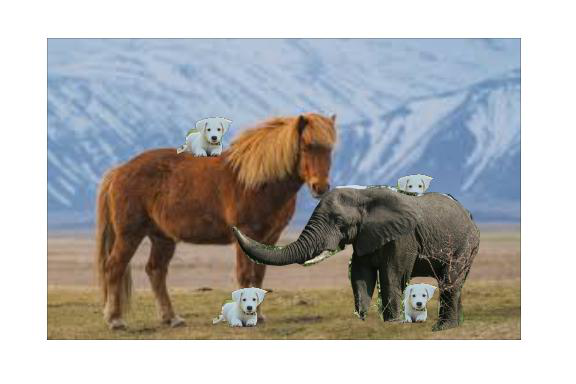

In [11]:
#load image
imagefile = '../images/animals_test_mixed_hidden-5.jpg'
img = load_img(imagefile)
img

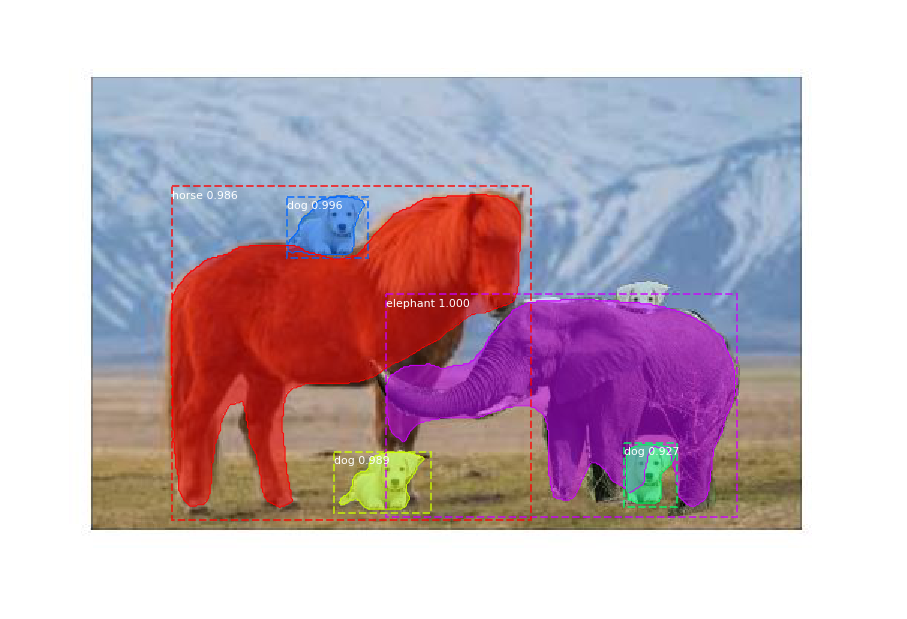

CPU times: user 6.98 s, sys: 3.35 s, total: 10.3 s
Wall time: 12.1 s


In [12]:
%%time
img = img_to_array(img)
# make prediction
results = rcnn.detect([img], verbose=False)
# get dictionary for first prediction
r = results[0]

# instantiate object
x = ObjectMapping(imagefile, r, class_names)
display_instances(img, r['rois'], r['masks'], r['class_ids'], class_names, r['scores'])

# Start Testing

In [18]:
ids = x.get_objectID()
ids

{1: 'elephant', 2: 'dog', 3: 'dog', 4: 'horse', 5: 'dog'}

In [0]:
x.object_class(1)

'elephant'

In [0]:
len(ids)

5

In [0]:
x.count_objects()

{'dog': 3, 'elephant': 1, 'horse': 1}

In [0]:
%%time
x.object_relations()

Analyzing object_id 1: elephant and object_id 2: dog
Analyzing object_id 1: elephant and object_id 3: dog
Analyzing object_id 1: elephant and object_id 4: horse
Analyzing object_id 1: elephant and object_id 5: dog
Analyzing object_id 2: dog and object_id 3: dog
Analyzing object_id 2: dog and object_id 4: horse
Analyzing object_id 2: dog and object_id 5: dog
Analyzing object_id 3: dog and object_id 4: horse
Analyzing object_id 3: dog and object_id 5: dog
Analyzing object_id 4: horse and object_id 5: dog
CPU times: user 4.33 s, sys: 8.81 ms, total: 4.34 s
Wall time: 4.36 s


{'object relations': {'above': [(1, 5), (2, 4), (2, 4), (4, 3)],
  'below': [(5, 1), (4, 2), (4, 2)],
  'in': [],
  'next to': [(1, 3), (1, 4), (1, 5), (3, 4)],
  'on': [(2, 4)],
  'touching': [(1, 5), (2, 4)]}}

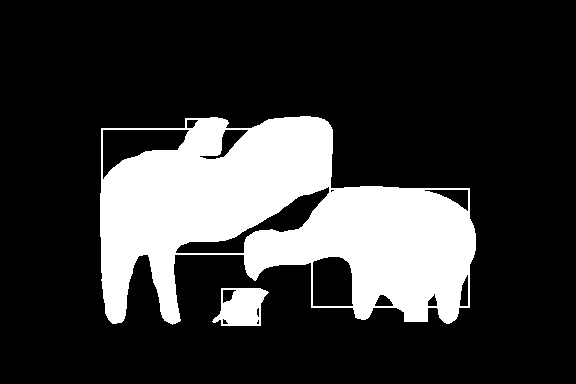

In [0]:
x.show_mask(1,2,3,4,5, show_massbox=True)

In [13]:
x.grid_coords(3,3,3, grid=True)

TypeError: ignored

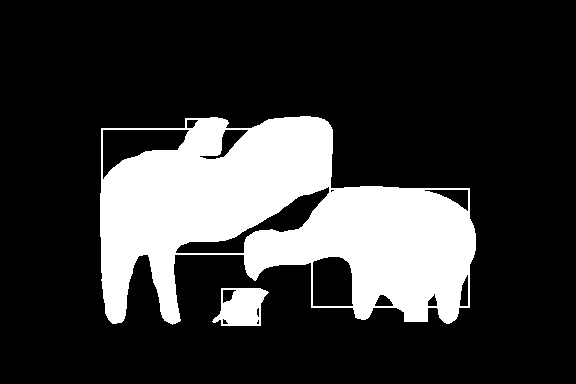

In [0]:
x.show_mask(1,2,3,4,5, show_massbox=True)

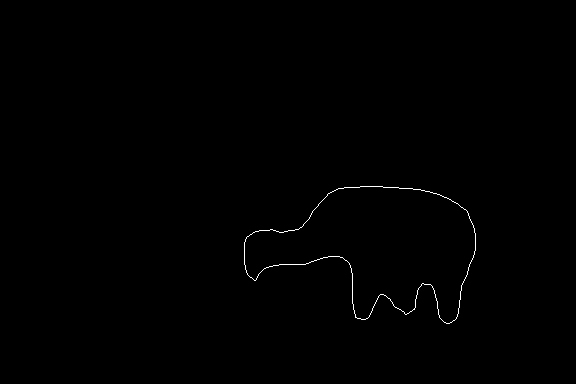

In [0]:
outline1 = x.object_outline(1)
x.show_mask(outline1)

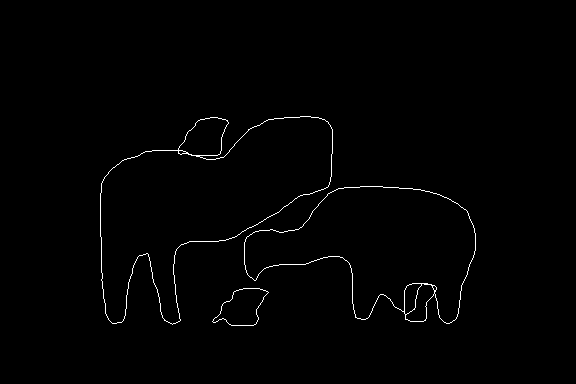

In [0]:
outline1 = x.object_outline(1,2,3,4,5)
x.show_mask(outline1)

In [59]:
#pass_object_id
x.object_location(3)

('bottom', 'center')

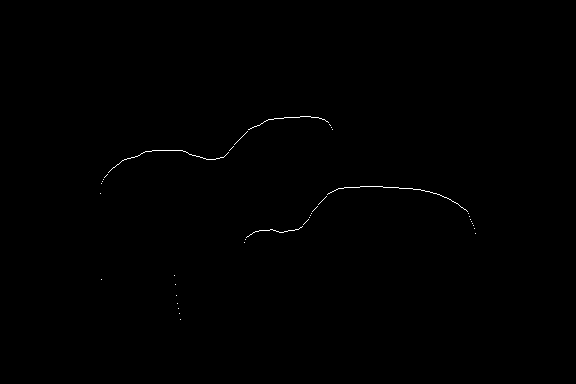

In [0]:
topline = x.object_topline(4,1)
x.show_mask(topline)

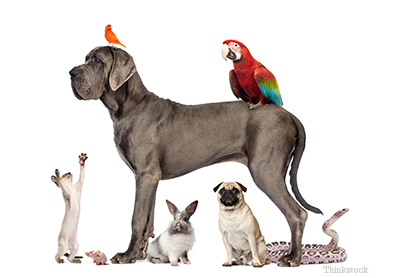

In [0]:
#load image
img = load_img('../images/mix_dog-cat-bird.jpg')
img

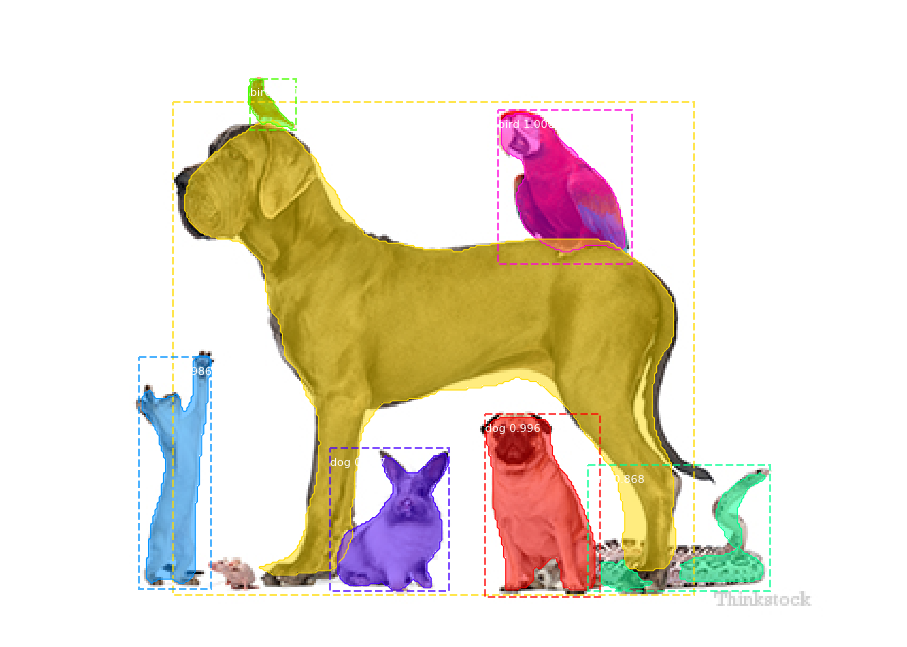

In [0]:
img = img_to_array(img)
# make prediction
results = rcnn.detect([img], verbose=False)
# get dictionary for first prediction
r = results[0]

# instantiate object
x = ObjectMapping('images/mix_dog-cat-bird.jpg', r, class_names)
display_instances(img, r['rois'], r['masks'], r['class_ids'], class_names, r['scores'])

In [0]:
x.get_objectID()

{1: 'bird', 2: 'dog', 3: 'dog', 4: 'person', 5: 'bird', 6: 'dog', 7: 'bird'}

In [0]:
x.count_objects()

{'bird': 3, 'dog': 3, 'person': 1}

In [0]:
x.grid_coords(4)

{('B', '1'), ('C', '1')}

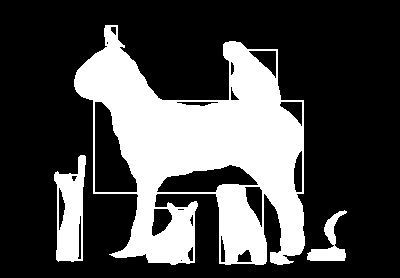

In [0]:
x.show_mask(1,2,3,4,5,6,7, show_massbox=True)

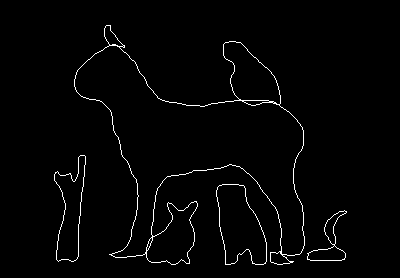

In [0]:
outline = x.object_outline(1,2,3,4,5,6,7)
x.show_mask(outline)

In [0]:
x.object_location(4)

('bottom', 'left')

In [0]:
%%time
x.object_relations()

Analyzing object_id 1: bird and object_id 2: dog
Analyzing object_id 1: bird and object_id 3: dog
Analyzing object_id 1: bird and object_id 4: person
Analyzing object_id 1: bird and object_id 5: bird
Analyzing object_id 1: bird and object_id 6: dog
Analyzing object_id 1: bird and object_id 7: bird
Analyzing object_id 2: dog and object_id 3: dog
Analyzing object_id 2: dog and object_id 4: person
Analyzing object_id 2: dog and object_id 5: bird
Analyzing object_id 2: dog and object_id 6: dog
Analyzing object_id 2: dog and object_id 7: bird
Analyzing object_id 3: dog and object_id 4: person
Analyzing object_id 3: dog and object_id 5: bird
Analyzing object_id 3: dog and object_id 6: dog
Analyzing object_id 3: dog and object_id 7: bird
Analyzing object_id 4: person and object_id 5: bird
Analyzing object_id 4: person and object_id 6: dog
Analyzing object_id 4: person and object_id 7: bird
Analyzing object_id 5: bird and object_id 6: dog
Analyzing object_id 5: bird and object_id 7: bird
Analy

{'object relations': {'above': [(1, 2),
   (1, 2),
   (1, 3),
   (2, 3),
   (2, 4),
   (2, 6),
   (7, 2),
   (7, 2)],
  'below': [(2, 1), (2, 1), (6, 2), (2, 7), (2, 7)],
  'in': [],
  'next to': [(2, 3), (2, 4), (2, 5), (2, 6), (3, 5), (3, 6)],
  'on': [(1, 2), (7, 2)],
  'touching': [(1, 2), (2, 5), (2, 6), (2, 7)]}}

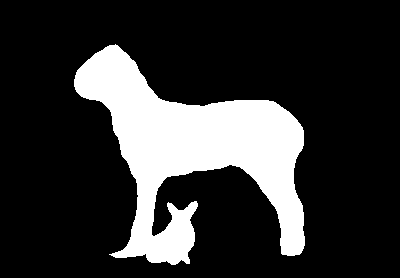

In [0]:
x.show_mask(2,6)

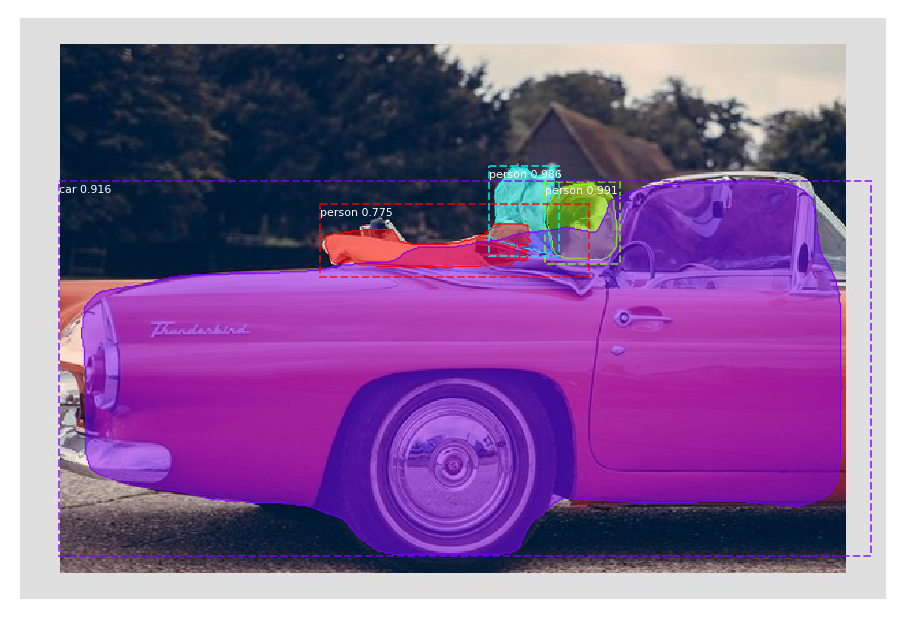

In [0]:
imagefile = '../images/mod_people_in_car1.jpg'
#load image
img = load_img(imagefile)
img = img_to_array(img)
# make prediction
results = rcnn.detect([img], verbose=False)
# get dictionary for first prediction
r = results[0]

# instantiate object
x = ObjectMapping(imagefile, r, class_names)
display_instances(img, r['rois'], r['masks'], r['class_ids'], class_names, r['scores'])

In [0]:
x.count_objects()

{'car': 1, 'person': 3}

In [0]:
x.get_objectID()

{1: 'person', 2: 'person', 3: 'car', 4: 'person'}

In [0]:
x.object_relations()

Analyzing object_id 1: person and object_id 2: person
Analyzing object_id 1: person and object_id 3: car
Analyzing object_id 1: person and object_id 4: person
Analyzing object_id 2: person and object_id 3: car
Analyzing object_id 2: person and object_id 4: person
Analyzing object_id 3: car and object_id 4: person


{'object relations': {'above': [(1, 3),
   (1, 3),
   (1, 4),
   (2, 3),
   (2, 3),
   (2, 4),
   (4, 3),
   (4, 3)],
  'below': [(3, 1), (3, 1), (3, 2), (3, 2), (4, 2), (3, 4), (3, 4)],
  'in': [],
  'next to': [(1, 2), (1, 4), (2, 4)],
  'on': [(1, 3), (2, 3), (4, 3)],
  'touching': [(1, 2), (1, 3), (2, 3), (2, 4), (3, 4)]}}

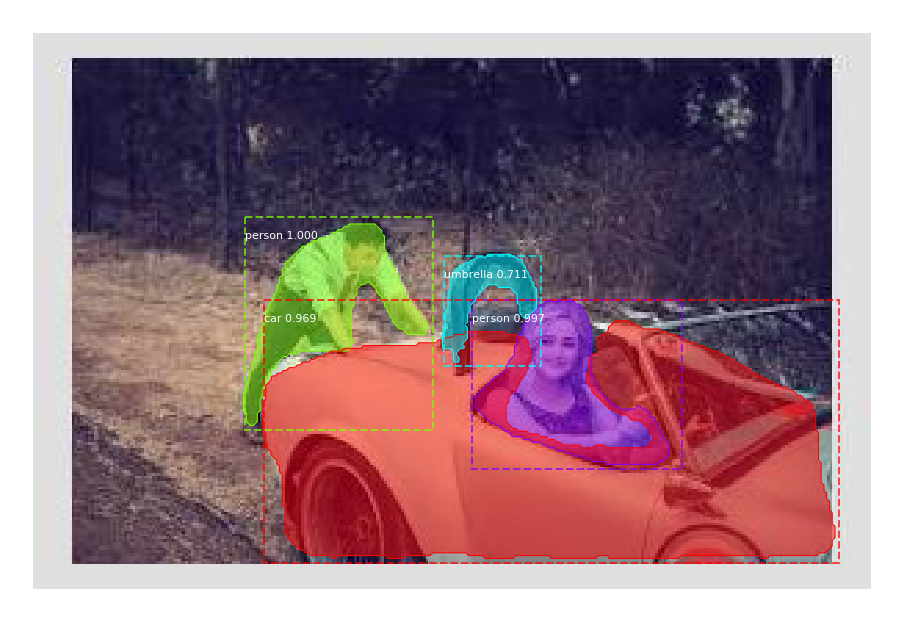

In [0]:
imagefile = '../images/mod_people_in_car2.jpg'
#load image
img = load_img(imagefile)
img = img_to_array(img)
# make prediction
results = rcnn.detect([img], verbose=False)
# get dictionary for first prediction
r = results[0]

# instantiate object
x = ObjectMapping(imagefile, r, class_names)
display_instances(img, r['rois'], r['masks'], r['class_ids'], class_names, r['scores'])

In [0]:
x.count_objects()

{'car': 1, 'person': 2, 'umbrella': 1}

In [0]:
x.get_objectID()

{1: 'person', 2: 'person', 3: 'car', 4: 'umbrella'}

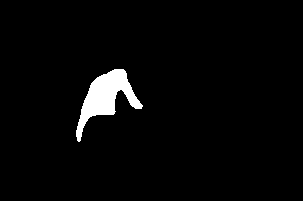

In [0]:
x.show_mask(1)

In [0]:
x.object_relations()

Analyzing object_id 1: person and object_id 2: person
Analyzing object_id 1: person and object_id 3: car
Analyzing object_id 1: person and object_id 4: umbrella
Analyzing object_id 2: person and object_id 3: car
Analyzing object_id 2: person and object_id 4: umbrella
Analyzing object_id 3: car and object_id 4: umbrella


{'object relations': {'above': [(1, 3),
   (1, 3),
   (2, 3),
   (2, 3),
   (4, 2),
   (4, 3),
   (4, 3)],
  'below': [(3, 1), (3, 1), (3, 2), (3, 2), (2, 4), (3, 4), (3, 4)],
  'in': [],
  'next to': [(1, 2), (1, 4), (2, 4)],
  'on': [(1, 3), (2, 3), (4, 3)],
  'touching': [(1, 3), (2, 3), (2, 4), (3, 4)]}}

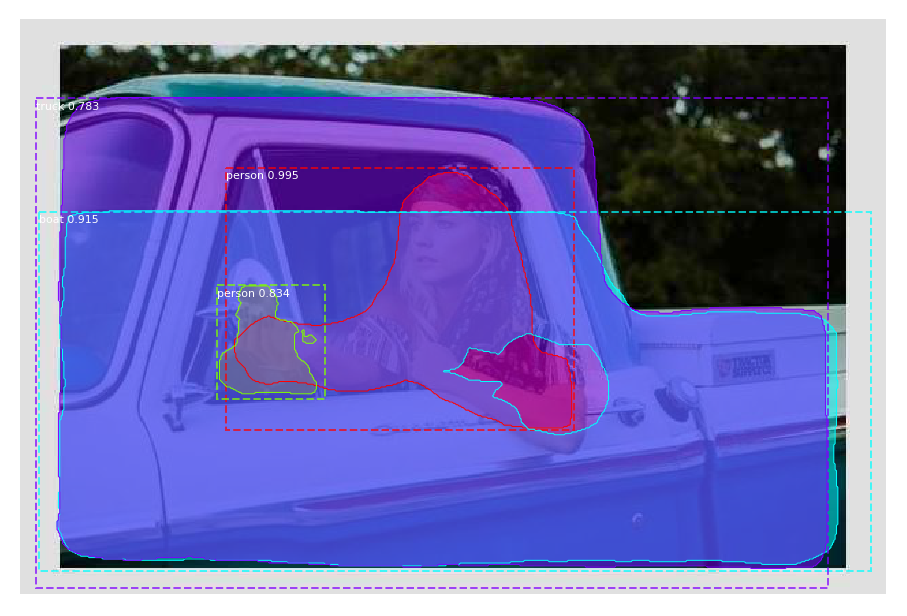

In [0]:
imagefile = '../images/mod_people_in_car3.jpg'
#load image
img = load_img(imagefile)
img = img_to_array(img)
# make prediction
results = rcnn.detect([img], verbose=False)
# get dictionary for first prediction
r = results[0]

# instantiate object
x = ObjectMapping(imagefile, r, class_names)
display_instances(img, r['rois'], r['masks'], r['class_ids'], class_names, r['scores'])

In [0]:
x.count_objects()

{'boat': 1, 'person': 2, 'truck': 1}

In [0]:
x.get_objectID()

{1: 'person', 2: 'boat', 3: 'person', 4: 'truck'}

In [0]:
x.object_relations()

Analyzing object_id 1: person and object_id 2: boat
Analyzing object_id 1: person and object_id 3: person
Analyzing object_id 1: person and object_id 4: truck
Analyzing object_id 2: boat and object_id 3: person
Analyzing object_id 2: boat and object_id 4: truck
Analyzing object_id 3: person and object_id 4: truck


{'object relations': {'above': [(1, 2),
   (1, 2),
   (1, 3),
   (1, 3),
   (1, 4),
   (3, 2),
   (4, 2),
   (4, 3),
   (4, 3)],
  'below': [(2, 1),
   (2, 1),
   (3, 1),
   (3, 1),
   (4, 1),
   (2, 3),
   (2, 4),
   (3, 4),
   (3, 4)],
  'in': [(1, 4), (3, 2)],
  'next to': [(2, 4)],
  'on': [(1, 2), (1, 3), (4, 3)],
  'touching': [(1, 2), (1, 3), (1, 4), (2, 3), (2, 4), (3, 4)]}}

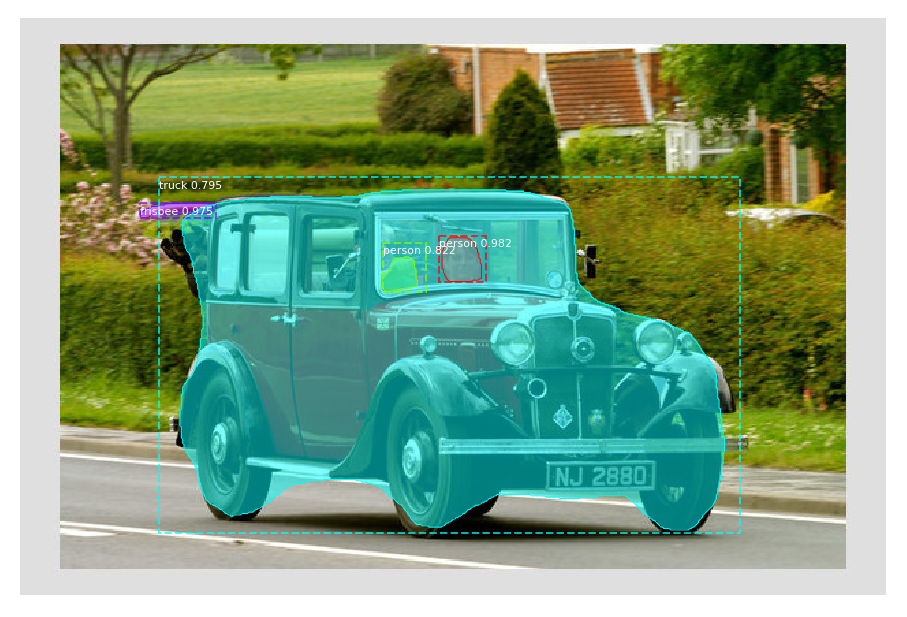

In [0]:
imagefile = '../images/mod_people_in_car4.jpg'
#load image
img = load_img(imagefile)
img = img_to_array(img)
# make prediction
results = rcnn.detect([img], verbose=False)
# get dictionary for first prediction
r = results[0]

# instantiate object
x = ObjectMapping(imagefile, r, class_names)
display_instances(img, r['rois'], r['masks'], r['class_ids'], class_names, r['scores'])

In [0]:
x.count_objects()

{'frisbee': 1, 'person': 2, 'truck': 1}

In [0]:
x.get_objectID()

{1: 'person', 2: 'frisbee', 3: 'person', 4: 'truck'}

In [0]:
x.object_relations()

Analyzing object_id 1: person and object_id 2: frisbee
Analyzing object_id 1: person and object_id 3: person
Analyzing object_id 1: person and object_id 4: truck
Analyzing object_id 2: frisbee and object_id 3: person
Analyzing object_id 2: frisbee and object_id 4: truck
Analyzing object_id 3: person and object_id 4: truck


{'object relations': {'above': [(1, 4), (2, 4), (2, 4), (3, 4)],
  'below': [(4, 1), (4, 2), (4, 2), (4, 3)],
  'in': [(1, 4), (3, 4)],
  'next to': [(1, 3)],
  'on': [(2, 4)],
  'touching': [(1, 4), (2, 4), (3, 4)]}}

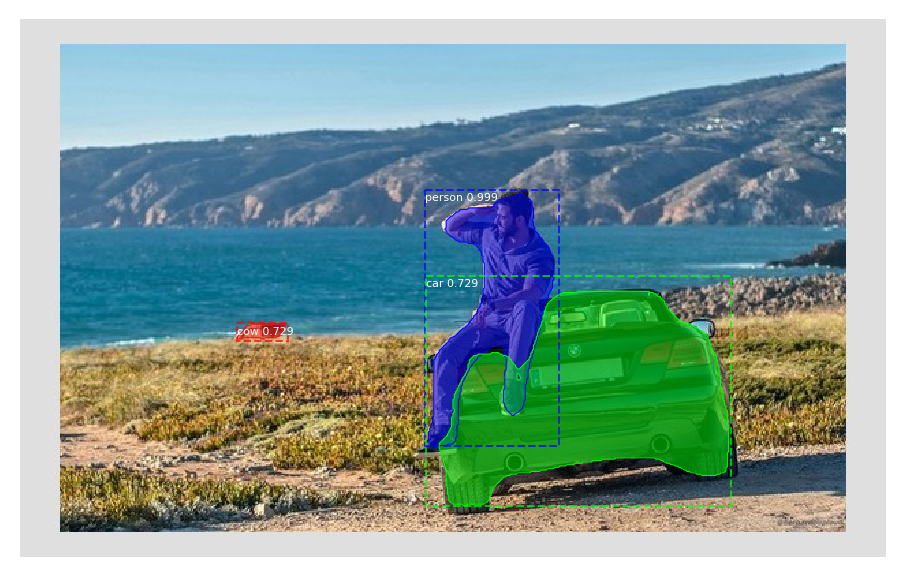

In [0]:
imagefile = '../images/mod_people_on_car1.jpg'
#load image
img = load_img(imagefile)
img = img_to_array(img)
# make prediction
results = rcnn.detect([img], verbose=False)
# get dictionary for first prediction
r = results[0]

# instantiate object
x = ObjectMapping(imagefile, r, class_names)
display_instances(img, r['rois'], r['masks'], r['class_ids'], class_names, r['scores'])

In [0]:
x.count_objects()

{'car': 1, 'cow': 1, 'person': 1}

In [0]:
x.get_objectID()

{1: 'person', 2: 'car', 3: 'cow'}

In [0]:
x.object_relations()

Analyzing object_id 1: person and object_id 2: car
Analyzing object_id 1: person and object_id 3: cow
Analyzing object_id 2: car and object_id 3: cow


{'object relations': {'next to': [],
  'above': [(1, 2), (1, 2)],
  'below': [(2, 1)],
  'touching': [(1, 2)],
  'on': [(1, 2)],
  'in': []}}

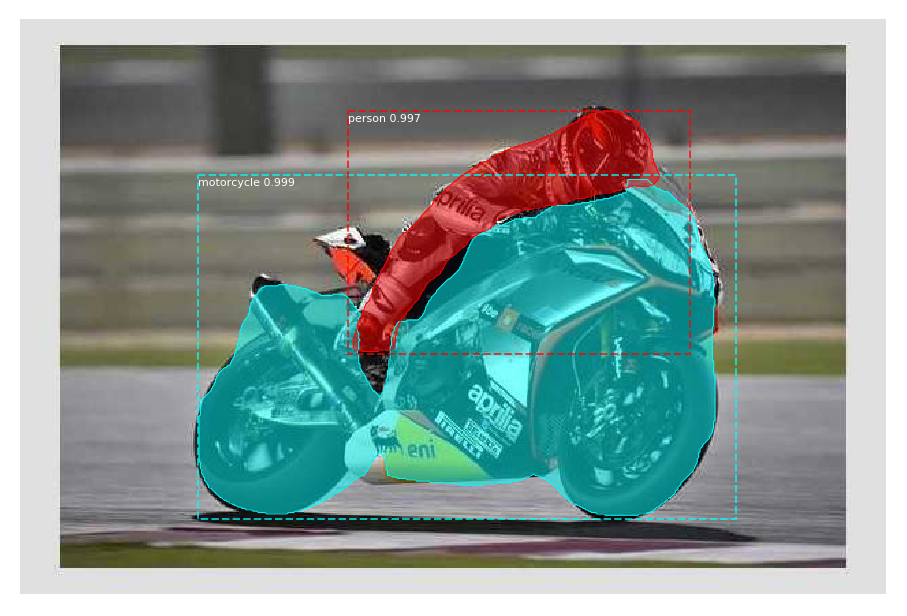

In [0]:
imagefile = '../images/mod_people_on_motorcycle.jpg'
#load image
img = load_img(imagefile)
img = img_to_array(img)
# make prediction
results = rcnn.detect([img], verbose=False)
# get dictionary for first prediction
r = results[0]

# instantiate object
x = ObjectMapping(imagefile, r, class_names)
display_instances(img, r['rois'], r['masks'], r['class_ids'], class_names, r['scores'])

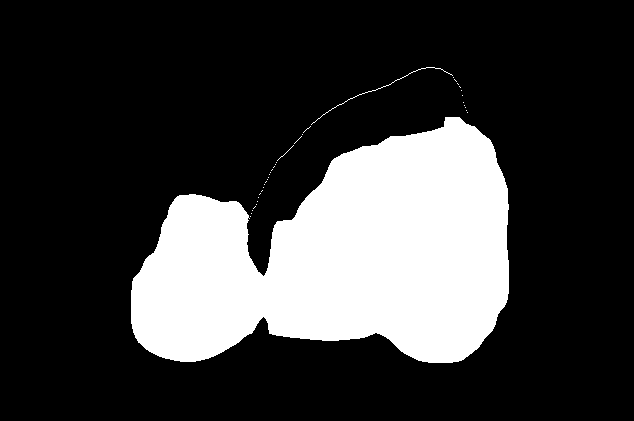

In [0]:
outline = x.object_topline(2)
x.show_mask(1,outline)

In [0]:
x.count_objects()

{'motorcycle': 1, 'person': 1}

In [0]:
x.get_objectID()

{1: 'motorcycle', 2: 'person'}

In [0]:
x.object_relations()

Analyzing object_id 1: motorcycle and object_id 2: person


{'object relations': {'next to': [],
  'above': [(2, 1), (2, 1)],
  'below': [(1, 2)],
  'touching': [(1, 2)],
  'on': [(2, 1)],
  'in': []}}

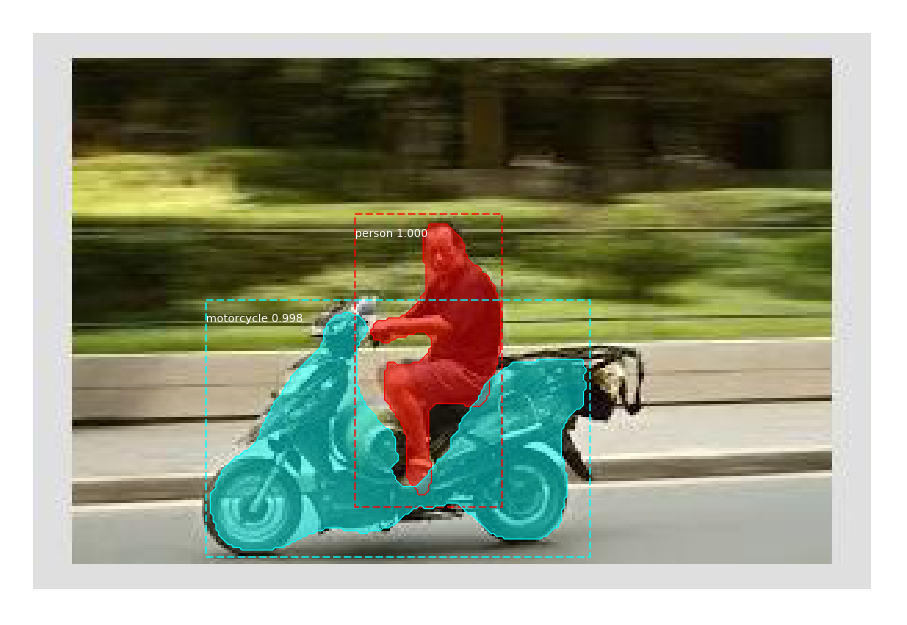

In [0]:
imagefile = '../images/mod_people_on_motorcycle2.jpg'
#load image
img = load_img(imagefile)
img = img_to_array(img)
# make prediction
results = rcnn.detect([img], verbose=False)
# get dictionary for first prediction
r = results[0]

# instantiate object
x = ObjectMapping(imagefile, r, class_names)
display_instances(img, r['rois'], r['masks'], r['class_ids'], class_names, r['scores'])

In [0]:
x.count_objects()

{'motorcycle': 1, 'person': 1}

In [0]:
x.get_objectID()

{1: 'person', 2: 'motorcycle'}

In [0]:
x.object_relations()

Analyzing object_id 1: person and object_id 2: motorcycle


{'object relations': {'next to': [],
  'above': [(1, 2), (1, 2)],
  'below': [(2, 1)],
  'touching': [(1, 2)],
  'on': [(1, 2)],
  'in': []}}

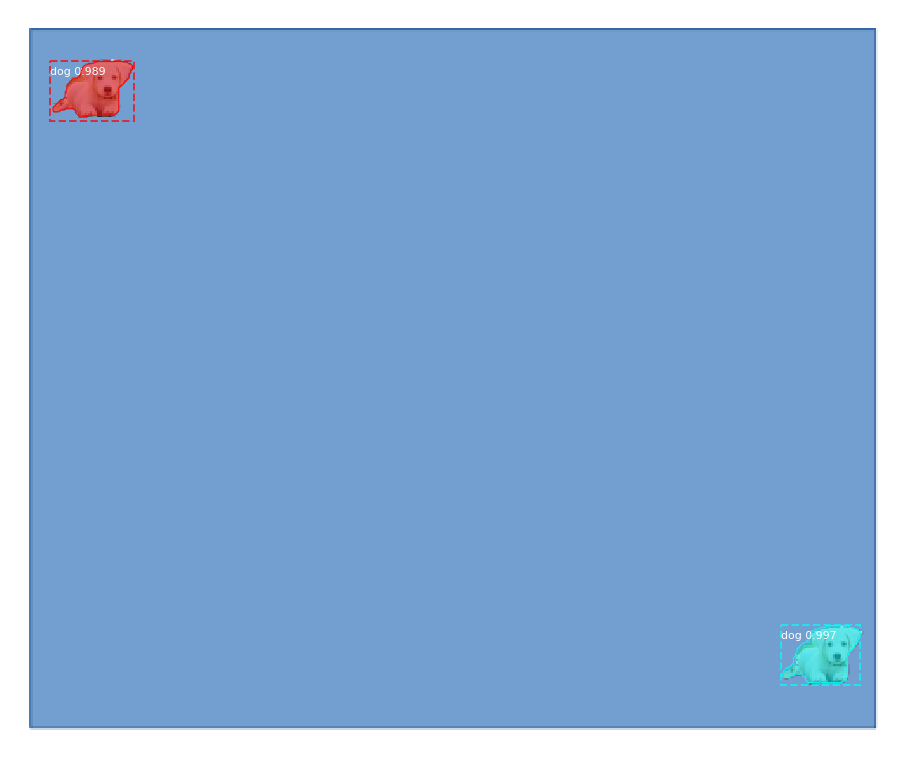

In [0]:
imagefile = '../images/dog_grid.png'
#load image
img = load_img(imagefile)
img = img_to_array(img)
# make prediction
results = rcnn.detect([img], verbose=False)
# get dictionary for first prediction
r = results[0]

# instantiate object
x = ObjectMapping(imagefile, r, class_names)
display_instances(img, r['rois'], r['masks'], r['class_ids'], class_names, r['scores'])

In [0]:
x.get_objectID()

{1: 'dog', 2: 'dog'}

In [0]:
x.grid_coords(2, 5, 5)

{('A', '1')}

In [0]:
x.grid_coords(1, 5, 5)

{('E', '5')}

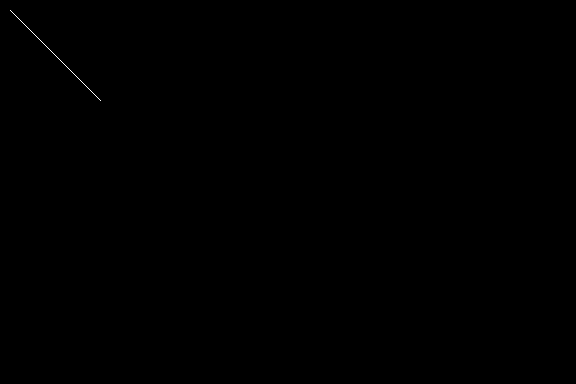

In [0]:
myimage2 = Image.new(mode='1', size=(x.img_width,x.img_height))
draw=ImageDraw.Draw(myimage2)
draw.line((10, 10, 100,100), fill="white")
myimage2

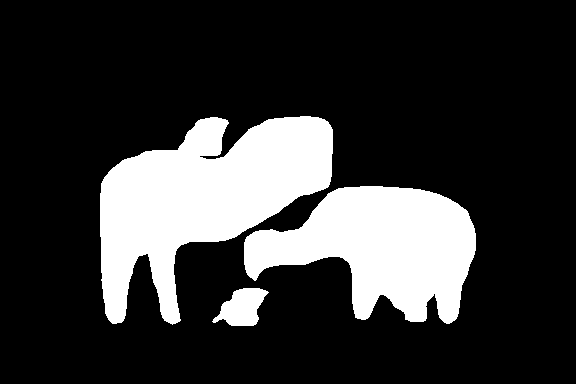

In [0]:
x.show_mask(1,2,3,4,5)

In [0]:
myimage2.paste(x.show_mask(1,2,3,4,5))

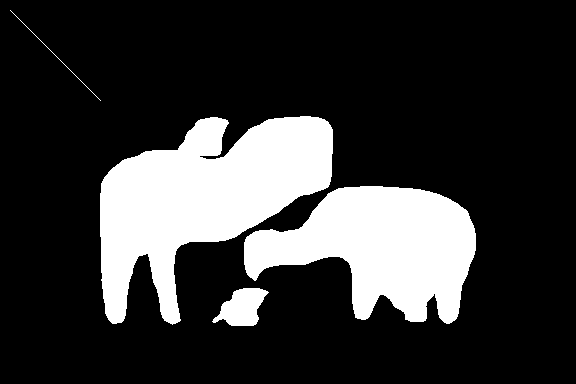

In [0]:
Image.composite(x.show_mask(1,2,3,4,5), myimage2, x.show_mask(1,2,3,4,5))

In [0]:
x.mass_box(1)

(188, 311, 308, 470)

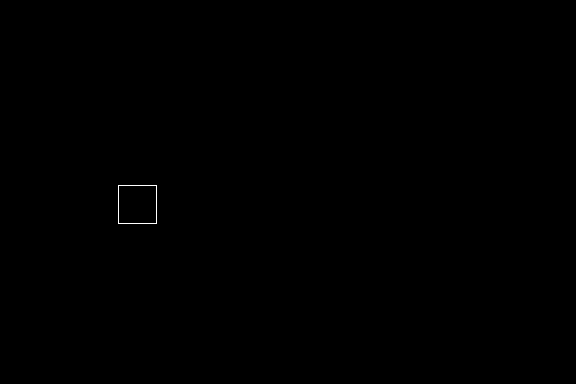

In [0]:
myimage3 = Image.new(mode='1', size=(x.img_width,x.img_height))
draw=ImageDraw.Draw(myimage3)
draw.rectangle(x.mass_box(2), outline="white")
myimage3

In [0]:
fnt = ImageFont.truetype('Pillow/Tests/fonts/FreeMono.ttf', 20)

In [0]:
myimage4 = Image.new(mode='1', size=(x.img_width,x.img_height))
draw=ImageDraw.Draw(myimage4)
draw.text((10,60), "World A1", font=fnt, fill="white")

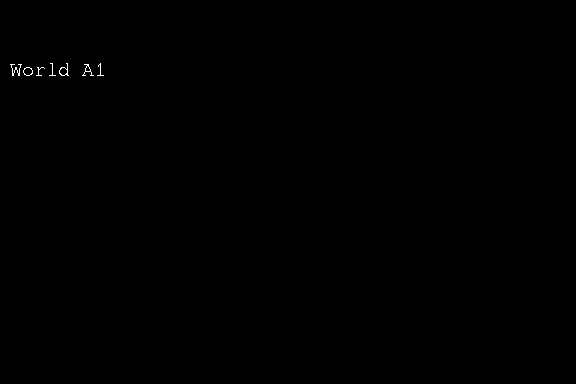

In [0]:
myimage4

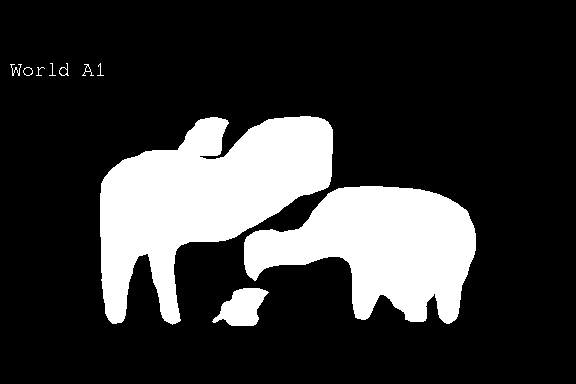

In [0]:
Image.composite(x.show_mask(1,2,3,4,5), myimage4, x.show_mask(1,2,3,4,5))

In [39]:
np.arange(0, x.img_height, x.img_height/3).astype(int)

array([  0, 128, 256])

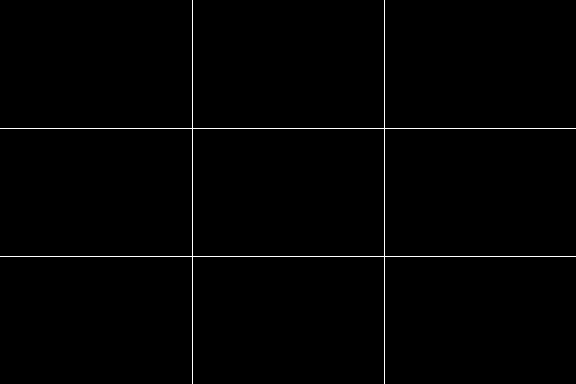

In [44]:
mygrid = Image.new(mode='1', size=(x.img_width,x.img_height))
draw=ImageDraw.Draw(mygrid)
draw.line((192, 0, 192, x.img_height), fill="white")
draw.line((384, 0, 384, x.img_height), fill="white")
draw.line((0, 128, x.img_width, 128), fill="white")
draw.line((0, 256, x.img_width, 256), fill="white")
mygrid